In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import tensorflow as tf

tf.config.threading.set_inter_op_parallelism_threads(6)
tf.config.threading.set_intra_op_parallelism_threads(2)

In [5]:
# dimensions of our images.
img_width, img_height = 224, 224

train_data_dir = '/home/user/Документы/convnets/transfer-learning-keras/dataset/training'
validation_data_dir = '/home/user/Документы/convnets/transfer-learning-keras/dataset/validation'
nb_train_samples = 3000
nb_validation_samples = 1000
epochs = 50
batch_size = 20

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
150/150 [==============================] - 63s 420ms/step - loss: 0.5561 - acc: 0.7233 - val_loss: 0.4194 - val_acc: 0.8290
Epoch 2/50
150/150 [==============================] - 60s 399ms/step - loss: 0.4252 - acc: 0.8137 - val_loss: 0.3527 - val_acc: 0.8540
Epoch 3/50
150/150 [==============================] - 59s 395ms/step - loss: 0.3951 - acc: 0.8267 - val_loss: 0.3728 - val_acc: 0.8320
Epoch 4/50
150/150 [==============================] - 60s 400ms/step - loss: 0.3551 - acc: 0.8540 - val_loss: 0.2872 - val_acc: 0.8900
Epoch 5/50
150/150 [==============================] - 59s 396ms/step - loss: 0.3301 - acc: 0.8750 - val_loss: 0.2611 - val_acc: 0.8840
Epoch 6/50
150/150 [==============================] - 59s 395ms/step - loss: 0.2914 - acc: 0.8860 - val_loss: 0.2923 - val_acc: 0.8860
Epoch 7/50
150/150 [==============================] - 59s 396ms/step - loss: 0.2845 - acc: 0.8883 - val_lo

Epoch 37/50
150/150 [==============================] - 60s 403ms/step - loss: 0.1029 - acc: 0.9563 - val_loss: 0.3539 - val_acc: 0.9270
Epoch 38/50
150/150 [==============================] - 61s 404ms/step - loss: 0.1160 - acc: 0.9527 - val_loss: 0.3751 - val_acc: 0.9170
Epoch 39/50
150/150 [==============================] - 61s 403ms/step - loss: 0.0959 - acc: 0.9597 - val_loss: 0.2836 - val_acc: 0.9270
Epoch 40/50
150/150 [==============================] - 61s 404ms/step - loss: 0.0980 - acc: 0.9623 - val_loss: 0.4612 - val_acc: 0.9140
Epoch 41/50
150/150 [==============================] - 60s 403ms/step - loss: 0.0953 - acc: 0.9620 - val_loss: 0.3774 - val_acc: 0.9150
Epoch 42/50
150/150 [==============================] - 62s 415ms/step - loss: 0.0990 - acc: 0.9643 - val_loss: 0.3927 - val_acc: 0.9160
Epoch 43/50
150/150 [==============================] - 60s 398ms/step - loss: 0.0893 - acc: 0.9630 - val_loss: 0.3437 - val_acc: 0.9180
Epoch 44/50
150/150 [===========================

In [6]:
model.save('/home/user/models/simple/conv_two_class.h5')

In [ ]:
plot_model(model, to_file='model.png')
plot_model(model, to_file='model.png')
    # Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

    # Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


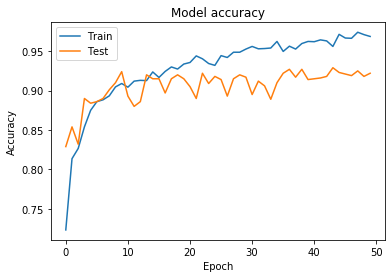

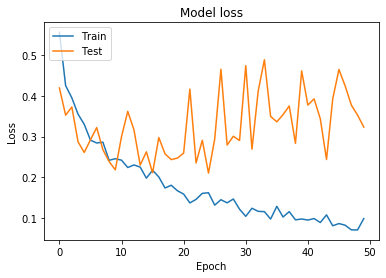